## Por: Daniel Lillo Plaza y Carlos Blom-Dahl Ramos

## HANDS-ON 3

In [ ]:
from keras.datasets import fashion_mnist
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Primero descargamos los datos y los vectorizamos.

In [ ]:

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))


4422102/4422102 [==============================] - 0s 0us/step


Ahora construimos el primer autoencoder. Si utilizamos la misma estructura que en los ejercicios anteriores entonces no obtenemos nada de interés, para cualquier imagen la red reconstruirá una especie de chaqueta. Por este motivo hemos elegido la siguiente estructura.

Epoch 1/15
1875/1875 [==============================] - 9s 3ms/step - loss: 0.0531 - val_loss: 0.0362
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0323 - val_loss: 0.0289
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0268 - val_loss: 0.0254
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0248 - val_loss: 0.0243
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0236 - val_loss: 0.0230
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0227 - val_loss: 0.0224
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0221 - val_loss: 0.0219
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0215 - val_loss: 0.0213
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0210 - val_loss: 0.0208
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.020

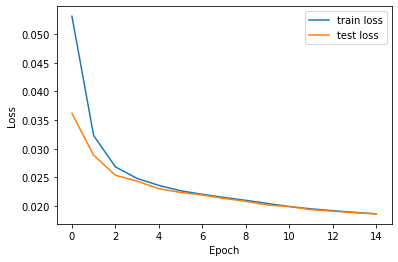

In [ ]:
dim_ent = 784
dim_cod = 32
act = 'sigmoid'
input_layer = Input(shape=(dim_ent,))
encoded = Dense(50, activation= act)(input_layer)
encoded = Dense(50, activation='relu')(encoded)
encoded = Dense(dim_cod, activation=act)(encoded)

decoded = Dense(50, activation=act)(encoded)
decoded = Dense(50, activation='relu')(decoded)
decoded = Dense(dim_ent, activation=act)(decoded)

autoencoder_1 = Model(input_layer, decoded)

autoencoder_1.compile(optimizer='adam', loss='mse')
history = autoencoder_1.fit(x_train, x_train, epochs=15, batch_size=32, validation_data = (x_test, x_test))

train_loss_1 = history.history['loss']
test_loss_1 = history.history['val_loss']

# Graficar ambas curvas de pérdida
plt.plot(train_loss_1, label='train loss')
plt.plot(test_loss_1, label='test loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Vemos como el entrenamiento parece ir de forma adecuada, ambas curvas descienden y llegan a un nivel de pérdida muy similar. 

Ahora vamos a ver como reconstruye dicho autoencoder algunas imágenes.

313/313 [==============================] - 1s 2ms/step


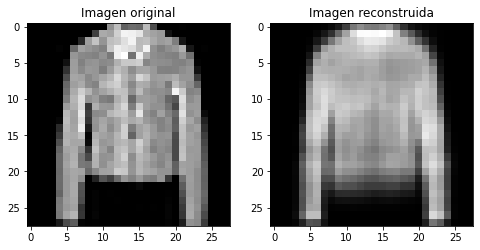

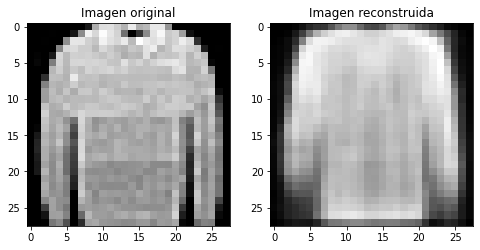

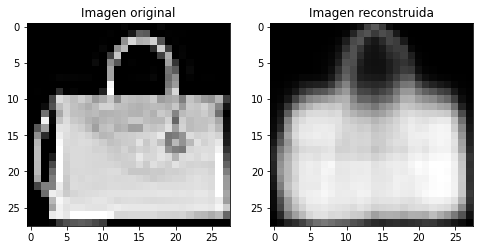

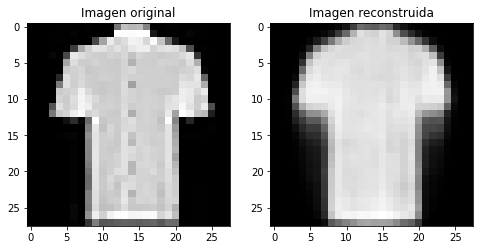

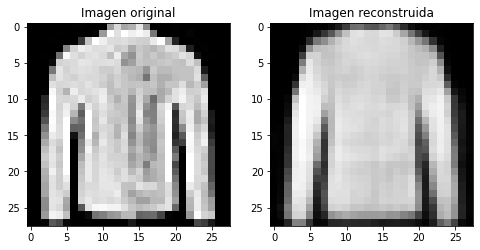

In [ ]:
img_dec = autoencoder_1.predict(x_test)
picks = [10 , 20 , 30, 40, 50]

for i in picks:
  fig, ax = plt.subplots(1, 2, figsize=(8, 4))
  ax[0].imshow(x_test[i].reshape(28,28), cmap='gray')
  ax[0].set_title('Imagen original')
  ax[1].imshow(img_dec[i].reshape(28,28), cmap='gray')
  ax[1].set_title('Imagen reconstruida')
  plt.show()


Vemos que funciona bastante bien y las reconstrucciones son bastante similares a la imagen original.

Ahora vamos a observar como funciona la red como modelo de _denoising_. Tomando las imágenes anteriores y añadiendo ruido vamos a ver que imagen reconstruye el autoencoder a partir de estas imágenes.

313/313 [==============================] - 1s 2ms/step


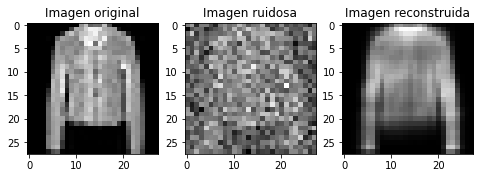

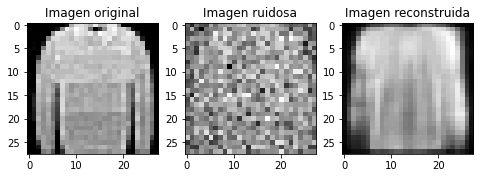

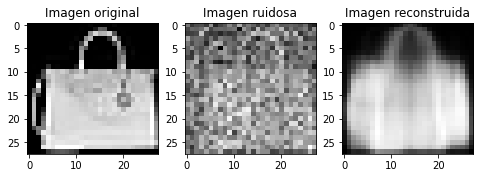

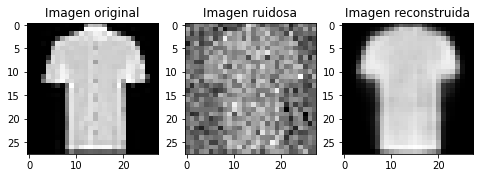

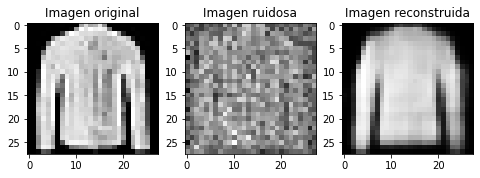

In [ ]:
x_test_nois = x_test + 0.5 * np.random.randn(x_test.shape[0],x_test.shape[1])

img_dec_nois = autoencoder_1.predict(x_test_nois)

for i in picks:
  fig, ax = plt.subplots(1, 3, figsize=(8, 4))
  ax[0].imshow(x_test[i].reshape(28,28), cmap='gray')
  ax[0].set_title('Imagen original')
  ax[1].imshow(x_test_nois[i].reshape(28,28), cmap='gray')
  ax[1].set_title('Imagen ruidosa')
  ax[2].imshow(img_dec_nois[i].reshape(28,28), cmap='gray')
  ax[2].set_title('Imagen reconstruida')
  plt.show()

Observamos que los resultados son bastante satisfactorios. Por ejemplo en las imágenes 1 y 2 cuesta bastante distinguir una forma en los datos pero la red consigue reconstruir la imagen de una forma muy fideligna.

Comparemos ahora con una PCA ya que podemos reducir la dimensión de las imágenes y luego reconstruirlas.

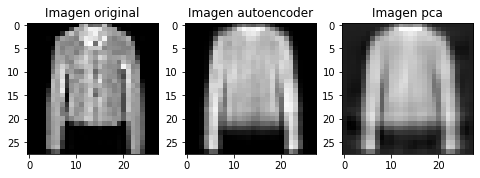

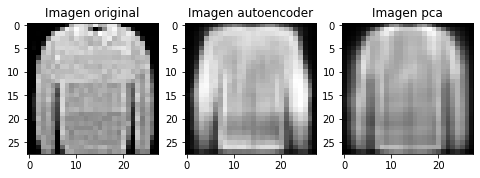

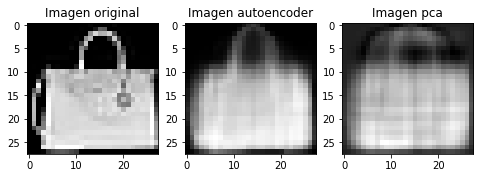

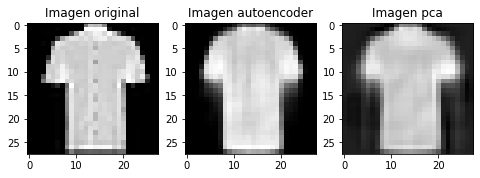

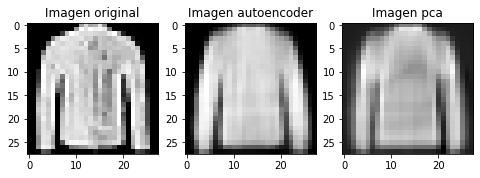

In [ ]:
pca = PCA(n_components=dim_cod)
pca.fit(x_train)
img_dec_pca = pca.inverse_transform(pca.transform(x_test))

for i in picks:
  fig, ax = plt.subplots(1, 3, figsize=(8, 4))
  ax[0].imshow(x_test[i].reshape(28,28), cmap='gray')
  ax[0].set_title('Imagen original')
  ax[1].imshow(img_dec[i].reshape(28,28), cmap='gray')
  ax[1].set_title('Imagen autoencoder')
  ax[2].imshow(img_dec_pca[i].reshape(28,28), cmap='gray')
  ax[2].set_title('Imagen pca')
  plt.show()

Aunque funciona mejor el autoencoder cabe destacar el poco tiempo necesario para calcular la PCA frente al autoencoder.

Si ahora comparamos ambos modelos como métodos de denoising observamos que ahora las diferencias son aún más notables. La red funciona bastante mejor, esto queda claro al observar las imágenes 2 y 3.

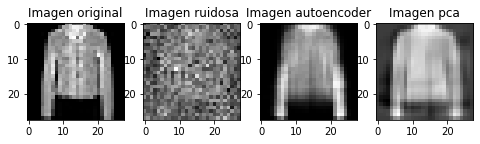

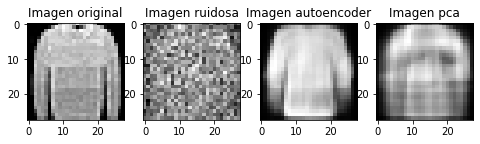

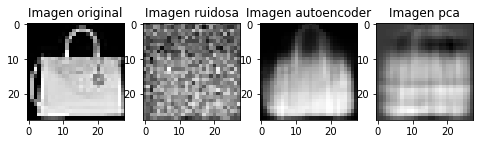

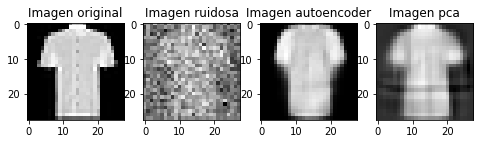

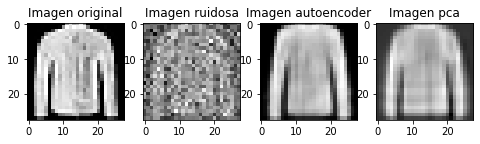

In [ ]:

img_dec_pca_nois = pca.inverse_transform(pca.transform(x_test_nois))

for i in picks:
  fig, ax = plt.subplots(1, 4, figsize=(8, 4))
  ax[0].imshow(x_test[i].reshape(28,28), cmap='gray')
  ax[0].set_title('Imagen original')
  ax[1].imshow(x_test_nois[i].reshape(28,28), cmap='gray')
  ax[1].set_title('Imagen ruidosa')
  ax[2].imshow(img_dec_nois[i].reshape(28,28), cmap='gray')
  ax[2].set_title('Imagen autoencoder')
  ax[3].imshow(img_dec_pca_nois[i].reshape(28,28), cmap='gray')
  ax[3].set_title('Imagen pca')
  plt.show()

Vamos a probar a añadir más capas al autoencoder, así obtendremos modelos profundos. Construimos los modelos _autoencoder\_x_ con x $\in\{1,2,3,4,5\}$ y donde x representa el orden de profundidad.

In [ ]:
input_layer = Input(shape=(dim_ent,))
encoded = Dense(50, activation= act)(input_layer)
encoded = Dense(50, activation='relu')(encoded)
encoded = Dense(50, activation='relu')(encoded)
encoded = Dense(dim_cod, activation=act)(encoded)

decoded = Dense(50, activation=act)(encoded)
decoded = Dense(50, activation='relu')(decoded)
decoded = Dense(50, activation='relu')(decoded)
decoded = Dense(dim_ent, activation=act)(decoded)

autoencoder_2 = Model(input_layer, decoded)



autoencoder_2.compile(optimizer='adam', loss='mse')
history = autoencoder_2.fit(x_train, x_train, epochs=15, batch_size=32, validation_data = (x_test, x_test))

train_loss_2 = history.history['loss']
test_loss_2 = history.history['val_loss']



Epoch 1/15
1875/1875 [==============================] - 11s 4ms/step - loss: 0.0521 - val_loss: 0.0354
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0341 - val_loss: 0.0328
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0324 - val_loss: 0.0316
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0305 - val_loss: 0.0295
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0279 - val_loss: 0.0263
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0257 - val_loss: 0.0250
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0245 - val_loss: 0.0242
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0236 - val_loss: 0.0232
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0227 - val_loss: 0.0224
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.02

In [ ]:
input_layer = Input(shape=(dim_ent,))
encoded = Dense(50, activation= act)(input_layer)
encoded = Dense(50, activation='relu')(encoded)
encoded = Dense(50, activation='relu')(encoded)
encoded = Dense(50, activation='relu')(encoded)
encoded = Dense(dim_cod, activation=act)(encoded)

decoded = Dense(50, activation=act)(encoded)
decoded = Dense(50, activation='relu')(decoded)
decoded = Dense(50, activation='relu')(decoded)
decoded = Dense(50, activation='relu')(decoded)
decoded = Dense(dim_ent, activation=act)(decoded)

autoencoder_3 = Model(input_layer, decoded)

autoencoder_3.compile(optimizer='adam', loss='mse')
history = autoencoder_3.fit(x_train, x_train, epochs=15, batch_size=32, validation_data = (x_test, x_test))

train_loss_3 = history.history['loss']
test_loss_3 = history.history['val_loss']


Epoch 1/15
1875/1875 [==============================] - 11s 4ms/step - loss: 0.0497 - val_loss: 0.0350
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0339 - val_loss: 0.0328
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0321 - val_loss: 0.0310
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0308 - val_loss: 0.0300
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0293 - val_loss: 0.0295
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0282 - val_loss: 0.0278
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0270 - val_loss: 0.0262
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0257 - val_loss: 0.0254
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0249 - val_loss: 0.0247
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.02

In [ ]:
input_layer = Input(shape=(dim_ent,))
encoded = Dense(50, activation= act)(input_layer)
encoded = Dense(50, activation='relu')(encoded)
encoded = Dense(50, activation='relu')(encoded)
encoded = Dense(50, activation='relu')(encoded)
encoded = Dense(50, activation='relu')(encoded)
encoded = Dense(dim_cod, activation=act)(encoded)

decoded = Dense(50, activation=act)(encoded)
decoded = Dense(50, activation='relu')(decoded)
decoded = Dense(50, activation='relu')(decoded)
decoded = Dense(50, activation='relu')(decoded)
decoded = Dense(50, activation='relu')(decoded)
decoded = Dense(dim_ent, activation=act)(decoded)

autoencoder_4 = Model(input_layer, decoded)

autoencoder_4.compile(optimizer='adam', loss='mse')
history = autoencoder_4.fit(x_train, x_train, epochs=15, batch_size=32, validation_data = (x_test, x_test))

train_loss_4 = history.history['loss']
test_loss_4 = history.history['val_loss']

Epoch 1/15
1875/1875 [==============================] - 12s 5ms/step - loss: 0.0546 - val_loss: 0.0393
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0341 - val_loss: 0.0314
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0310 - val_loss: 0.0301
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0299 - val_loss: 0.0303
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0290 - val_loss: 0.0287
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0285 - val_loss: 0.0284
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0278 - val_loss: 0.0281
Epoch 8/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0272 - val_loss: 0.0266
Epoch 9/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0268 - val_loss: 0.0263
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.02

In [ ]:
input_layer = Input(shape=(dim_ent,))
encoded = Dense(50, activation= act)(input_layer)
encoded = Dense(50, activation='relu')(encoded)
encoded = Dense(50, activation='relu')(encoded)
encoded = Dense(50, activation='relu')(encoded)
encoded = Dense(50, activation='relu')(encoded)
encoded = Dense(50, activation='relu')(encoded)
encoded = Dense(dim_cod, activation=act)(encoded)

decoded = Dense(50, activation=act)(encoded)
decoded = Dense(50, activation='relu')(decoded)
decoded = Dense(50, activation='relu')(decoded)
decoded = Dense(50, activation='relu')(decoded)
decoded = Dense(50, activation='relu')(decoded)
decoded = Dense(50, activation='relu')(decoded)
decoded = Dense(dim_ent, activation=act)(decoded)

autoencoder_5 = Model(input_layer, decoded)

autoencoder_5.compile(optimizer='adam', loss='mse')
history = autoencoder_5.fit(x_train, x_train, epochs=15, batch_size=32, validation_data = (x_test, x_test))

train_loss_5 = history.history['loss']
test_loss_5 = history.history['val_loss']

Epoch 1/15
1875/1875 [==============================] - 13s 5ms/step - loss: 0.0566 - val_loss: 0.0419
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0352 - val_loss: 0.0317
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0311 - val_loss: 0.0303
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0299 - val_loss: 0.0294
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0293 - val_loss: 0.0289
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0288 - val_loss: 0.0284
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0284 - val_loss: 0.0280
Epoch 8/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0280 - val_loss: 0.0278
Epoch 9/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0276 - val_loss: 0.0271
Epoch 10/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0

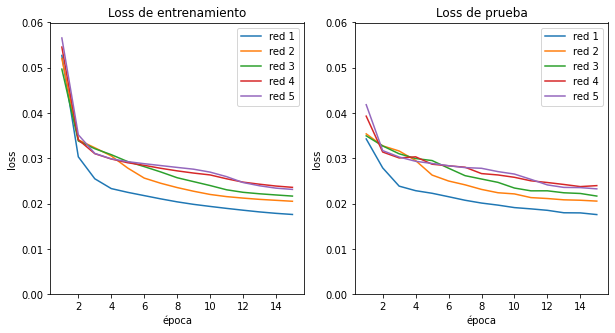

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# plot de los datos de entrenamiento
epochs = range(1, len(train_loss_1) + 1)
ax1.plot(epochs, train_loss_1, label='red 1')
ax1.plot(epochs, train_loss_2, label='red 2')
ax1.plot(epochs, train_loss_3, label='red 3')
ax1.plot(epochs, train_loss_4, label='red 4')
ax1.plot(epochs, train_loss_5, label='red 5')
ax1.set_title('Loss de entrenamiento')
ax1.set_xlabel('época')
ax1.set_ylabel('loss')
ax1.legend()
ax1.set_ylim([0, 0.06])

# plot de los datos de prueba
epochs = range(1, len(test_loss_1) + 1)
ax2.plot(epochs, test_loss_1, label='red 1')
ax2.plot(epochs, test_loss_2, label='red 2')
ax2.plot(epochs, test_loss_3, label='red 3')
ax2.plot(epochs, test_loss_4, label='red 4')
ax2.plot(epochs, test_loss_5, label='red 5')
ax2.set_title('Loss de prueba')
ax2.set_xlabel('época')
ax2.set_ylabel('loss')
ax2.legend()
ax2.set_ylim([0, 0.06])

plt.show()

Observamos que a medida que aumenta la profundidad también aumenta la pérdida, por tanto parece que el primer modelo es el más apropiado. Cabe destacar que a medida que aumenta la profundidad también aumenta el número de parámetros pero para compararlos hemos elegido un número de épocas común, en este caso 15 épocas.

Veamos ahora cuales son los resultados de aplicar estas redes a las tareas de reconstrucción y de denoising.

313/313 [==============================] - 1s 3ms/step


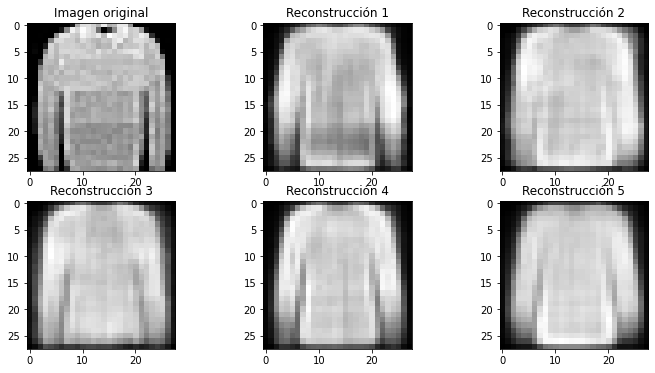

In [ ]:
i=20

fig, ax = plt.subplots(2, 3, figsize=(12, 6))
ax[0,0].imshow(x_test[i].reshape(28,28), cmap='gray')
ax[0,0].set_title('Imagen original')
ax[0,1].imshow(autoencoder_1.predict(x_test)[i].reshape(28,28), cmap='gray')
ax[0,1].set_title('Reconstrucción 1')
ax[0,2].imshow(autoencoder_2.predict(x_test)[i].reshape(28,28), cmap='gray')
ax[0,2].set_title('Reconstrucción 2')
ax[1,0].imshow(autoencoder_3.predict(x_test)[i].reshape(28,28), cmap='gray')
ax[1,0].set_title('Reconstrucción 3')
ax[1,1].imshow(autoencoder_4.predict(x_test)[i].reshape(28,28), cmap='gray')
ax[1,1].set_title('Reconstrucción 4')
ax[1,2].imshow(autoencoder_5.predict(x_test)[i].reshape(28,28), cmap='gray')
ax[1,2].set_title('Reconstrucción 5')

plt.show()

313/313 [==============================] - 1s 2ms/step


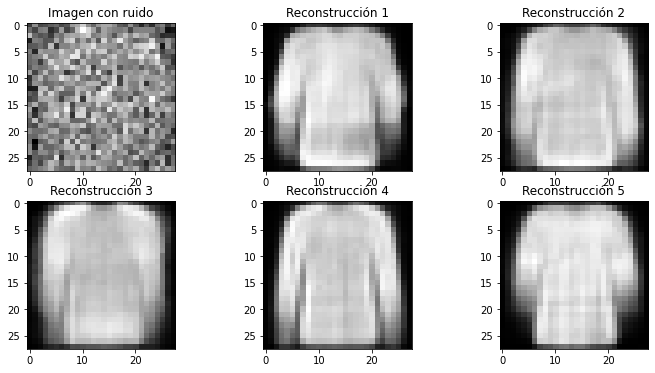

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6))
ax[0,0].imshow(x_test_nois[i].reshape(28,28), cmap='gray')
ax[0,0].set_title('Imagen con ruido')
ax[0,1].imshow(autoencoder_1.predict(x_test_nois)[i].reshape(28,28), cmap='gray')
ax[0,1].set_title('Reconstrucción 1')
ax[0,2].imshow(autoencoder_2.predict(x_test_nois)[i].reshape(28,28), cmap='gray')
ax[0,2].set_title('Reconstrucción 2')
ax[1,0].imshow(autoencoder_3.predict(x_test_nois)[i].reshape(28,28), cmap='gray')
ax[1,0].set_title('Reconstrucción 3')
ax[1,1].imshow(autoencoder_4.predict(x_test_nois)[i].reshape(28,28), cmap='gray')
ax[1,1].set_title('Reconstrucción 4')
ax[1,2].imshow(autoencoder_5.predict(x_test_nois)[i].reshape(28,28), cmap='gray')
ax[1,2].set_title('Reconstrucción 5')

plt.show()

Observamos que si que parece que a medida que aumentamos la profundidad estemos obteniendo peores resultados pero tampoco llegan a ser malas reconstrucciones.

## HANDS-ON 4

Vamos a implementar un autoencoder convolucional, ya que vamos a compararlo con los modelos deep anteriores hemos optado por añadir una capa densa en cada parte de la red para obtener un espacio latente de dimensión 32.

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense

# Recuperamos el tamaño original de los datos
x_train_orig = x_train.reshape((len(x_train), 28, 28, 1))
x_test_orig = x_test.reshape((len(x_test), 28, 28, 1))


input_img = Input(shape=(28, 28, 1))

# Definir el encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Dense(32, activation='relu')(x)

# Definir el decoder
x = Dense(32,activation='relu')(encoded)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Definir el modelo
autoencoder_conv = Model(input_img, decoded)

# Compilar el modelo
autoencoder_conv.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
autoencoder_conv.fit(x_train_orig, x_train_orig, epochs=10, batch_size=32, shuffle=True, validation_data=(x_test_orig, x_test_orig))





Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.0128 - val_loss: 0.0080
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0071 - val_loss: 0.0063
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0058 - val_loss: 0.0055
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [ ]:
autoencoder_conv.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 dense_4 (Dense)             (None, 7, 7, 32)          544 

Una vez entrenado el modelo vamos a ver algunas reconstrucciones y vamos a comparar con el modelo que mejor ha funcionado en el apartado anterior.

313/313 [==============================] - 1s 3ms/step


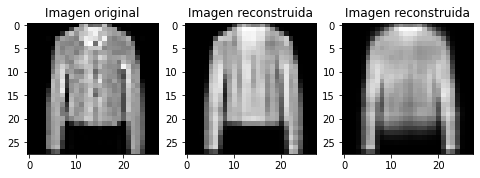

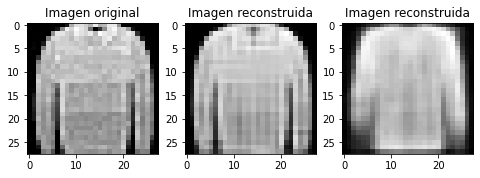

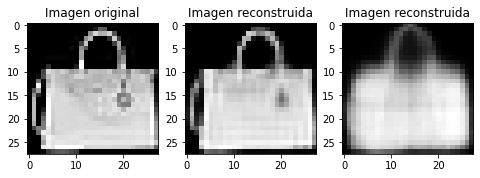

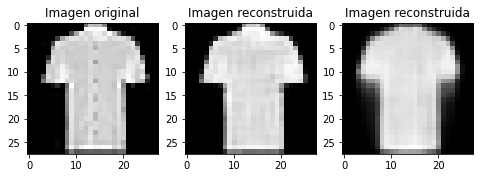

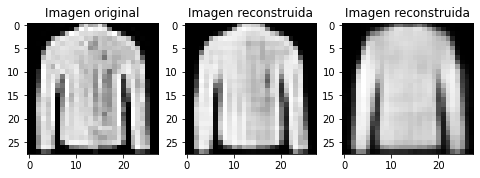

In [ ]:
img_dec_conv = autoencoder_conv.predict(x_test_orig)
picks = [10 , 20 , 30, 40, 50]

for i in picks:
  fig, ax = plt.subplots(1, 3, figsize=(8, 4))
  ax[0].imshow(x_test[i].reshape(28,28), cmap='gray')
  ax[0].set_title('Imagen original')
  ax[1].imshow(img_dec_conv[i].reshape(28,28), cmap='gray')
  ax[1].set_title('Imagen reconstruida')
  ax[2].imshow(img_dec[i].reshape(28,28), cmap='gray')
  ax[2].set_title('Imagen reconstruida')
  plt.show()

Observamos una notable diferencia. El autoencoder convolucional consigue una reconstrucción mucho más fiel que la obtenida con la red deep.

Veamos ahora la diferencia entre ambos modelos a la hora de aplicarlos a denoising.

313/313 [==============================] - 1s 3ms/step


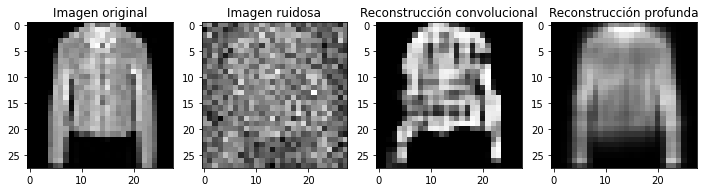

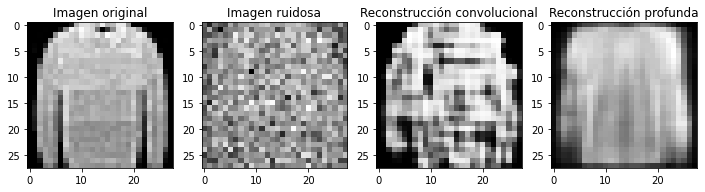

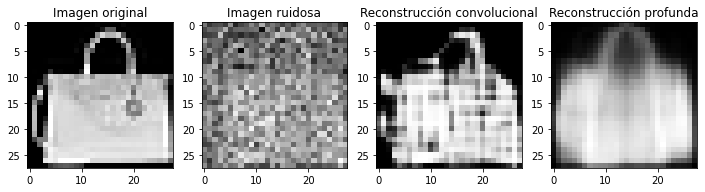

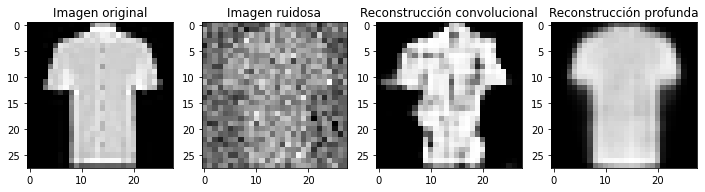

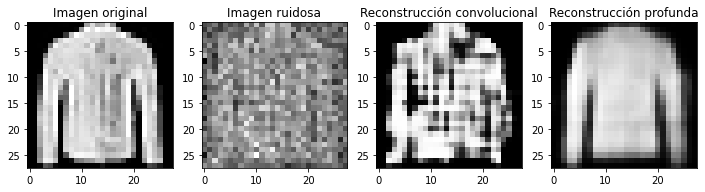

In [ ]:
x_test_nois = x_test_nois.reshape((len(x_test_nois), 28, 28, 1))

img_dec_conv_nois = autoencoder_conv.predict(x_test_nois)

for i in picks:
  fig, ax = plt.subplots(1, 4, figsize=(12, 6))
  ax[0].imshow(x_test[i].reshape(28,28), cmap='gray')
  ax[0].set_title('Imagen original')
  ax[1].imshow(x_test_nois[i].reshape(28,28), cmap='gray')
  ax[1].set_title('Imagen ruidosa')
  ax[2].imshow(img_dec_conv_nois[i].reshape(28,28), cmap='gray')
  ax[2].set_title('Reconstrucción convolucional')
  ax[3].imshow(img_dec_nois[i].reshape(28,28), cmap='gray')
  ax[3].set_title('Reconstrucción profunda')
  plt.show()

Parece que las redes convolucionales no funcionan muy bien con datos con mucho ruido. En cambio como hemos visto antes la red profunda ofrece resultados más que aceptables. 

El código que se presenta en las diapositivas toma una muestra del test y multiplica todos sus valores por 5. A continuación se calcula el error absoluto de cada imagen. Podemos observar en la gráfica que hay un pico muy alto en la imagen 1000. Esto es porque la red neuronal se ha entrenado con valores entre 0 y 1, al intentar predecir con valores entre 0 y 5 la red no actua como es debido.

313/313 [==============================] - 1s 3ms/step


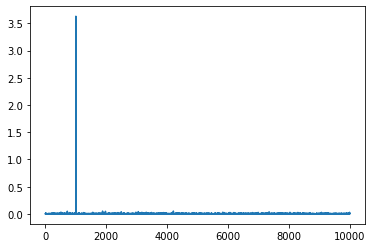

In [ ]:
x_test_2 = x_test.copy()
x_test_2[1000,:] = 5 * x_test_2[1000,:]
x_test_2 = x_test_2.reshape((len(x_test_2), 28, 28, 1))
x_test_2_pred = autoencoder_conv.predict(x_test_2)
error_tes = np.mean(np.abs(x_test_2-x_test_2_pred)**2,axis=tuple(range(1,x_test_2.ndim)))
plt.figure
plt.plot(error_tes)

Veamos ahora la predicción que ha hecho la red convolucional sobre la imagen nº1000.





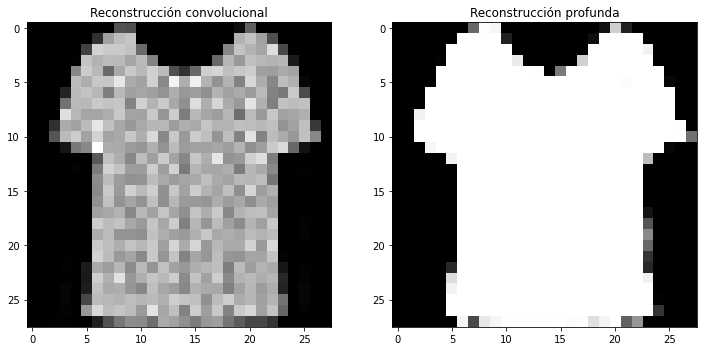

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(x_test_2[1000].reshape(28,28), cmap='gray')
ax[0].set_title('Reconstrucción convolucional')
ax[1].imshow(x_test_2_pred[1000].reshape(28,28), cmap='gray')
ax[1].set_title('Reconstrucción profunda')
plt.show()